In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qubit_zz_coupling.core import setup_operators, solve_t1, solve_t2, make_population, plot_t1, plot_t2
from qutip import basis, tensor
from qtt.algorithms.functions import gauss_ramsey, fit_gauss_ramsey, plot_gauss_ramsey_fit

from qutip import basis, tensor, sigmaz, sigmax, sigmaz, sigmam, sigmap, mesolve, identity, Qobj, destroy, qeye


In [2]:
def sz_analytic(tlist, g):
    return np.cos(2 * np.pi * tlist) * np.exp(-tlist * g)


In [11]:
# Define system parameters
SYSTEM_PARAMS = {
    "fq1": 3.2,  # GHz, Qubit 1 frequency
    "fq2": 3.35,  # GHz, Qubit 2 frequency
    "fTLS": 3.2,  # GHz, TLS frequency (resonant with Qubit 1)
    "JTLS": 0.05,  # GHz, Coupling strength between Qubit 1 and TLS
    "relaxation": {"q1": 1/200, "q2": 1/250, "TLS": 1/5},  # Relaxation rates
    "dephasing": {"q1": 1/150, "q2": 1/180, "TLS": 1/3},  # Dephasing rates
    "Jzz": 0.00, # Jzz coupling
    "Jxx": 0.00, # Jxx coupling
    "time_points": np.linspace(0, 400, 100)  # Time points in μs
}

H, c_ops, sz_q1, sz_q2, sx_q1, sx_q2 = setup_operators(system_params=SYSTEM_PARAMS)

# get times
tlist = SYSTEM_PARAMS["time_points"]

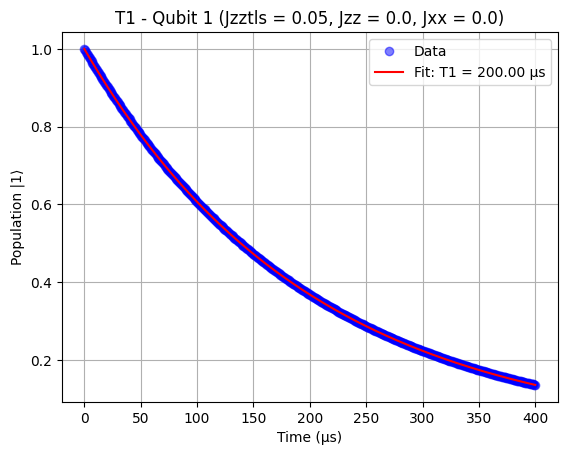

In [6]:
# T1 measurement for Qubit 1 
psi0 = tensor(basis(2,0), basis(2,1), basis(2,1))  # |0⟩|1⟩|1⟩

solve_t1(H, psi0, tlist, c_ops, [sz_q1], ret_pop=False)
plot_t1(H, psi0, tlist, c_ops, [sz_q1], "Qubit 1", SYSTEM_PARAMS)
plt.show()

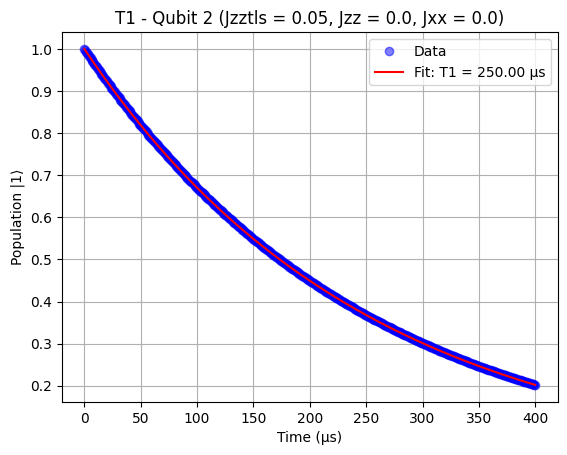

In [7]:
# T1 measurement for Qubit 2 
psi0 = tensor(basis(2,1), basis(2,0), basis(2,1))  # |0⟩|1⟩|1⟩

solve_t1(H, psi0, tlist, c_ops, [sz_q2], ret_pop=False)
plot_t1(H, psi0, tlist, c_ops, [sz_q2], "Qubit 2", SYSTEM_PARAMS)
plt.show()

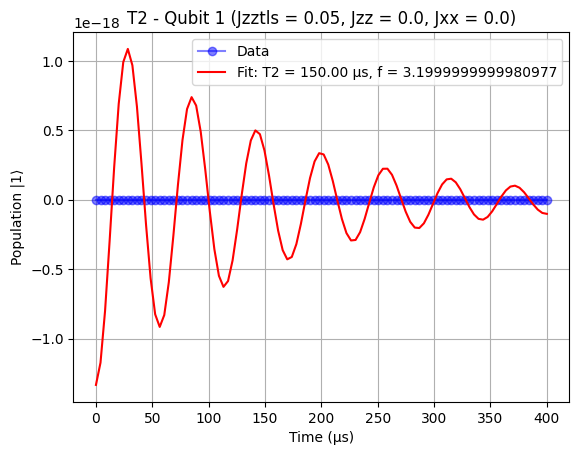

In [14]:
# T2 measurement for Qubit 1 
psi0 = tensor((basis(2,1) + basis(2,0)).unit(), basis(2,1), basis(2,1))  # |+⟩|1⟩|1⟩

first_guess = [0.5, 1.0 / SYSTEM_PARAMS["dephasing"]["q1"], SYSTEM_PARAMS["fq1"], 0.0, 0.5]

solve_t2(H, psi0, tlist, [c_ops[1]], [sz_q1], first_guess, ret_pop=False)
plot_t2(H, psi0, tlist, [c_ops[1]], [sz_q1], first_guess, "Qubit 1", SYSTEM_PARAMS)
#plt.plot(tlist, make_population(sz_analytic(tlist, 1.0/180)), label="Analytic")
plt.show()

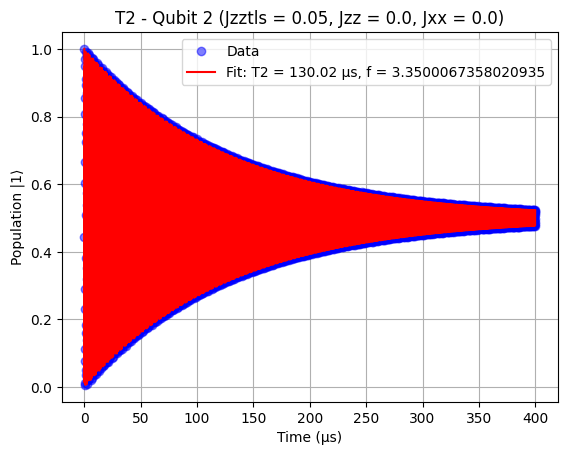

In [93]:
# T2 measurement for Qubit 1 
psi0 = tensor(basis(2,1), (basis(2,1) + basis(2,0)).unit(), basis(2,1))  # |+⟩|1⟩|1⟩

first_guess = [0.5, 1.0 / SYSTEM_PARAMS["dephasing"]["q2"], SYSTEM_PARAMS["fq2"], 0.0, 0.5]

solve_t2(H, psi0, tlist, c_ops, [sx_q2], first_guess, ret_pop=False)
plot_t2(H, psi0, tlist, c_ops, [sx_q2], first_guess, "Qubit 2", SYSTEM_PARAMS)
plt.show()

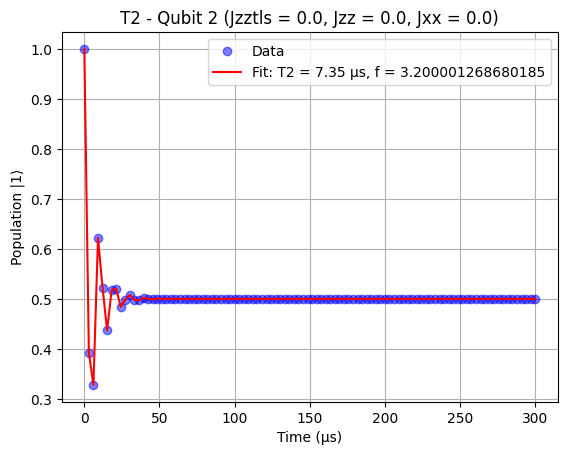

In [44]:
# single qbit
sz_q1 = sigmaz()

H = 2 * np.pi * 3.2 / 2 * sz_q1

c_ops = [
    np.sqrt(1/20) * sigmam(),
    np.sqrt((1/18)) * sigmaz(),
]

tlist = np.linspace(0, 300, 100)

# T2 measurement for Qubit 1 
psi0 = (basis(2, 0) + basis(2, 1)).unit()  # |+⟩|1⟩|1⟩


first_guess = [0.5, 1.0 / (1/18), # best guess
                  3.2, 0.0, 0.5]

solve_t2(H, psi0, tlist, c_ops, [sigmax()], first_guess, ret_pop=False)
plot_t2(H, psi0, tlist, c_ops, [sigmax()], first_guess, "Qubit 2", SYSTEM_PARAMS)
plt.show()



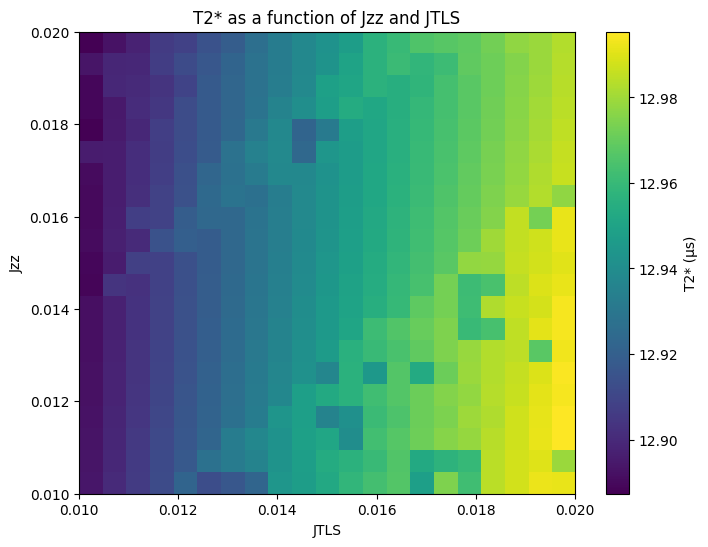

[[12.89383025 12.90008365 12.9062007  12.91216208 12.92229243 12.91266458
  12.91656228 12.92265391 12.94427694 12.94745615 12.95257156 12.95853333
  12.96304601 12.96632648 12.94838733 12.97465234 12.96238371 12.98423768
  12.98819477 12.99203478 12.99171339]
 [12.89337186 12.89954663 12.90558003 12.91159179 12.91741927 12.92745974
  12.93213613 12.93574153 12.94273124 12.94775939 12.95372936 12.95682933
  12.96064045 12.96599525 12.95283887 12.95725655 12.95978475 12.98405157
  12.9879983  12.9902387  12.97930792]
 [12.89294459 12.89907767 12.90506593 12.91097078 12.91675267 12.92250565
  12.93249183 12.93737241 12.94244653 12.94877746 12.95134201 12.94019101
  12.96260233 12.96706174 12.97143216 12.97564837 12.97841207 12.98382414
  12.98776095 12.99163568 12.99537934]
 [12.89258195 12.89862084 12.90457935 12.91044112 12.91619783 12.92182894
  12.92741937 12.93288754 12.94369519 12.94849989 12.93583507 12.94175008
  12.96112033 12.96539344 12.97116341 12.97385277 12.97954869 12.9823

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qubit_zz_coupling.core import setup_operators, solve_t2
from qutip import basis, tensor

# Define parameter ranges
Jzz_vals = np.linspace(0.01, 0.02, 21)
JTLS_vals = np.linspace(0.01, 0.02, 21)
T2_matrix = np.zeros((len(Jzz_vals), len(JTLS_vals)))

# Base system parameters (without Jzz and JTLS)
base_params = {
    "fq1": 3.2,
    "fq2": 3.3,
    "fTLS": 3.2,
    "relaxation": {"q1": 1/20, "q2": 1/25, "TLS": 1/5},
    "dephasing": {"q1": 1/15, "q2": 1/18, "TLS": 1/3},
    "Jxx": 0.03,
    "time_points": np.linspace(0, 100, 200)
}

tlist = base_params["time_points"]

for i, Jzz in enumerate(Jzz_vals):
    for j, JTLS in enumerate(JTLS_vals):
        # Update parameters for this scan
        params = base_params.copy()
        params["Jzz"] = Jzz
        params["JTLS"] = JTLS

        # Setup system
        H, c_ops, sz_q1, sz_q2, sx_q1, sx_q2 = setup_operators(system_params=params)
        psi0 = tensor( basis(2, 1), (basis(2, 0) + basis(2, 1)).unit(), basis(2, 1))  # |+⟩|1⟩|1⟩
        first_guess = [0.5, 1.0 / params["dephasing"]["q2"], params["fq2"], 0.0, 0.5]

        # Solve T2 and store the fitted T2 value
        try:
            fit_par = solve_t2(H, psi0, tlist, c_ops, [sx_q2], first_guess, ret_pop=False, use_fit_gauss=True)
        except:
            print(f"Error solving T2 for Jzz={Jzz}, JTLS={JTLS}")
            continue 
        T2_matrix[i, j] = fit_par[1]  # T2* is the second parameter

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(T2_matrix, origin='lower', aspect='auto',
           extent=[JTLS_vals[0], JTLS_vals[-1], Jzz_vals[0], Jzz_vals[-1]],
           cmap='viridis')
plt.colorbar(label='T2* (μs)')
plt.xlabel('JTLS')
plt.ylabel('Jzz')
plt.title('T2* as a function of Jzz and JTLS')
plt.show()

print(T2_matrix)

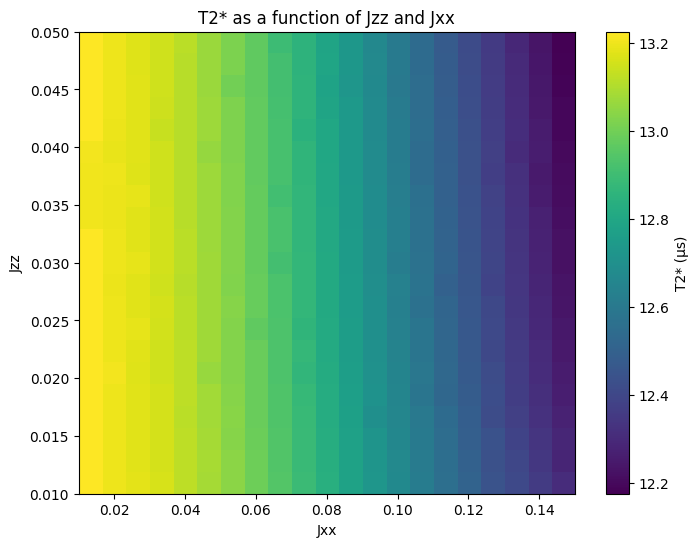

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from qubit_zz_coupling.core import setup_operators, solve_t2
from qutip import basis, tensor

# Define parameter ranges
Jzz_vals = np.linspace(0.01, 0.05, 21)
Jxx_vals = np.linspace(0.01, 0.15, 21)
T2_matrix = np.zeros((len(Jzz_vals), len(Jxx_vals)))

# Base system parameters (without Jzz and Jxx)
base_params = {
    "fq1": 3.2,
    "fq2": 3.35,
    "fTLS": 3.2,
    "relaxation": {"q1": 1/20, "q2": 1/25, "TLS": 1/5},
    "dephasing": {"q1": 1/15, "q2": 1/18, "TLS": 1/3},
    "JTLS": 0.05,
    "time_points": np.linspace(0, 100, 200)
}

tlist = base_params["time_points"]

for i, Jzz in enumerate(Jzz_vals):
    for j, Jxx in enumerate(Jxx_vals):
        # Update parameters for this scan
        params = base_params.copy()
        params["Jzz"] = Jzz
        params["Jxx"] = Jxx

        # Setup system
        H, c_ops, sz_q1, sz_q2, sx_q1, sx_q2 = setup_operators(system_params=params)
        psi0 = tensor(basis(2, 1), (basis(2, 0) + basis(2, 1)).unit(), basis(2, 1))  # |+⟩|1⟩|1⟩
        first_guess = [0.5, 1.0 / params["dephasing"]["q2"], params["fq2"], 0.0, 0.5]

        # Solve T2 and store the fitted T2 value
        try:
            fit_par = solve_t2(H, psi0, tlist, c_ops, [sx_q2], first_guess, ret_pop=False)
        except Exception as e:
            print(f"Error solving T2 for Jzz={Jzz}, Jxx={Jxx}: {e}")
            continue
        T2_matrix[i, j] = fit_par[1]  # T2* is the second parameter

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(T2_matrix, origin='lower', aspect='auto',
           extent=[Jxx_vals[0], Jxx_vals[-1], Jzz_vals[0], Jzz_vals[-1]],
           cmap='viridis')
plt.colorbar(label='T2* (μs)')
plt.xlabel('Jxx')
plt.ylabel('Jzz')
plt.title('T2* as a function of Jzz and Jxx')
plt.show()